In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('./Data/Housing.csv')

# Convert categorical variables to numeric
le = LabelEncoder()
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Define features and target variables
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df['price']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1481693327820.2048


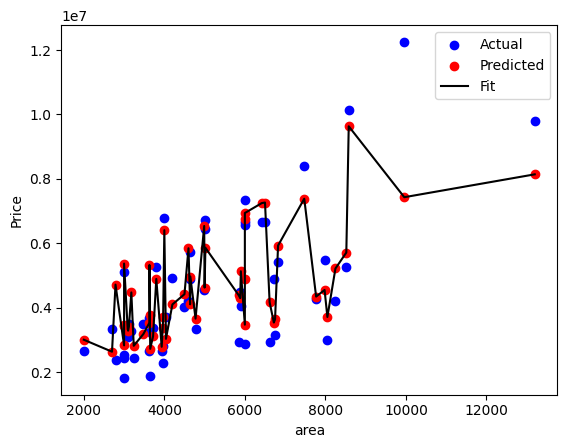

In [106]:
import matplotlib.pyplot as plt
import operator

# Assuming that 'area' is the most significant feature
feature = 'area'

# Create a DataFrame from X_test for easier plotting
X_test_df = pd.DataFrame(X_test, columns=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'])

# Create a scatter plot
plt.scatter(X_test_df[feature], y_test, color='blue', label='Actual')
plt.scatter(X_test_df[feature], y_pred, color='red', label='Predicted')

# Create a line plot for predictions
sort_axis = operator.itemgetter(feature)(X_test_df)
sorted_zip = sorted(zip(sort_axis, y_pred))
X_test_feature, y_pred = zip(*sorted_zip)
plt.plot(X_test_feature, y_pred, color='black', label='Fit')

plt.xlabel(feature)
plt.ylabel('Price')
plt.legend()
plt.show()

